# Import

In [ ]:
# Cellule 1 : Imports
import pandas as pd
import numpy as np
import sys
from pathlib import Path


sys.path.append(str(Path.cwd().parent))

from src.land_value_prediction.analyse_base_de_donnees import analyse_variable_qualitative as avql
from src.land_value_prediction.analyse_base_de_donnees import analyse_variable_quantitative as avqt

In [44]:
X_train = pd.read_csv("../data/X_train.csv")
y_train = pd.read_csv("../data/y_train.csv").squeeze() # squeeze pour convertir en Series sinon ca marche pas
X_train = avql.convertir_types_analyse(X_train)

print(f"X_train: {X_train.shape} | y_train: {y_train.shape}")
print(f"Type de y_train: {type(y_train)}")
X_train.head()


X_train: (764718, 24) | y_train: (764718,)
Type de y_train: <class 'pandas.core.series.Series'>


,date_mutation,nature_mutation,valeur_fonciere,adresse_nom_voie,code_postal,code_commune,nom_commune,code_departement,nombre_lots,code_type_local,...,longitude,latitude,annee,mois,trimestre,quartier,quartier_detaille,prix_median_m2,ecart_prix_median_pct,annee_date
0,2020-07-01,Vente,246600.0,SEN DES LONGUES RAIES,77670,77419,Saint-Mammès,77,0,1,...,2.817040,48.383233,2020,7,3,Saint-Mammès (77670.0),Saint-Mammès (77670.0),2502.013809,-6.132755,2020-01-01
1,2020-07-01,Vente,184520.0,AV HENRI BARBUSSE,94240,94038,L'Haÿ-les-Roses,94,2,2,...,2.328166,48.780891,2020,7,3,L'Haÿ-les-Roses (94240.0),L'Haÿ-les-Roses (94240.0),4109.589041,-16.852099,2020-01-01
2,2020-07-01,Vente,164000.0,AV ROUGET DE LISLE,94400,94081,Vitry-sur-Seine,94,1,2,...,2.395257,48.779350,2020,7,3,Vitry-sur-Seine (94400.0),Vitry-sur-Seine (94400.0),4396.296296,-1.831242,2020-01-01
3,2020-07-01,Vente,2000000.0,RUE SAINT LOUIS,78000,78646,Versailles,78,0,1,...,2.127896,48.794210,2020,7,3,Versailles (78000.0),Versailles (78000.0),7068.965517,54.604825,2020-01-01
4,2020-07-01,Vente en l'état futur d'achèvement,585000.0,LE MANET,78180,78423,Montigny-le-Bretonneux,78,1,2,...,2.024012,48.767701,2020,7,3,Montigny-le-Bretonneux (78180.0),Montigny-le-Bretonneux (78180.0),4166.666667,17.000000,2020-01-01


In [45]:
X_test = pd.read_csv("../data/X_test.csv")
y_test = pd.read_csv("../data/y_test.csv")['prix_m2']


X_test = avql.convertir_types_analyse(X_test)

print(f"X_test: {X_test.shape} | y_test: {y_test.shape}")
print(f"Type de y_test: {type(y_test)}")
X_test.head()

X_test: (50956, 24) | y_test: (50956,)
Type de y_test: <class 'pandas.core.series.Series'>


,date_mutation,nature_mutation,valeur_fonciere,adresse_nom_voie,code_postal,code_commune,nom_commune,code_departement,nombre_lots,code_type_local,...,longitude,latitude,annee,mois,trimestre,quartier,quartier_detaille,prix_median_m2,ecart_prix_median_pct,annee_date
0,2025-01-02,Vente,223000.0,RUE DE LA FONTAINE AU ROI,75011,75111,Paris 11e Arrondissement,75,1,2,...,2.368344,48.868772,2025,1,1,Paris 11e Arrondissement (75011.0),Paris .0e,9656.533575,4.968968,2025-01-01
1,2025-01-02,Vente,184000.0,RUE DE CHARONNE,75011,75111,Paris 11e Arrondissement,75,2,2,...,2.388058,48.855392,2025,1,1,Paris 11e Arrondissement (75011.0),Paris .0e,9656.533575,-9.264492,2025-01-01
2,2025-01-02,Vente,380000.0,RUE PETION,75011,75111,Paris 11e Arrondissement,75,1,2,...,2.381864,48.858731,2025,1,1,Paris 11e Arrondissement (75011.0),Paris .0e,9656.533575,-6.305726,2025-01-01
3,2025-01-02,Vente,171162.0,CITE POPINCOURT,75011,75111,Paris 11e Arrondissement,75,1,2,...,2.374846,48.862490,2025,1,1,Paris 11e Arrondissement (75011.0),Paris .0e,9656.533575,77.249940,2025-01-01
4,2025-01-02,Vente,1400000.0,RUE PAUL SEJOURNE,75006,75106,Paris 6e Arrondissement,75,1,2,...,2.332268,48.841695,2025,1,1,Paris 6e Arrondissement (75006.0),Paris .0e,9656.533575,83.518432,2025-01-01


In [46]:
types_vars = avql.identifier_types_variables(X_train)
print(f"Variables catégoriques ({len(types_vars['categoriques'])}): {types_vars['categoriques']}")
print(f"Variables numériques ({len(types_vars['numeriques'])}): {types_vars['numeriques']}")


Variables catégoriques (12): ['nature_mutation', 'adresse_nom_voie', 'code_postal', 'code_commune', 'nom_commune', 'code_departement', 'code_type_local', 'type_local', 'mois', 'trimestre', 'quartier', 'quartier_detaille']
Variables numériques (10): ['valeur_fonciere', 'nombre_lots', 'surface_reelle_bati', 'nombre_pieces_principales', 'surface_terrain', 'longitude', 'latitude', 'annee', 'prix_median_m2', 'ecart_prix_median_pct']


# ANALYSE DES VARIABLES QUALITATIVES

### Statistiques descriptives 

In [47]:
for col in types_vars['categoriques']:
    avql.afficher_stats_qualitative(X_train, col)


Variable: nature_mutation
Nombre de catégories uniques: 6
Valeurs manquantes: 0

Top 10 des valeurs:
                                    Effectif  Pourcentage
nature_mutation                                          
Vente                                 711712    93.068556
Vente en l'état futur d'achèvement     48862     6.389545
Adjudication                            3035     0.396878
Echange                                  890     0.116383
Vente terrain à bâtir                    116     0.015169
Expropriation                            103     0.013469

Variable: adresse_nom_voie
Nombre de catégories uniques: 42001
Valeurs manquantes: 3

Top 10 des valeurs:
                         Effectif  Pourcentage
adresse_nom_voie                              
RUE DE PARIS                 4649     0.607939
AV JEAN JAURES               3669     0.479787
AV DE LA REPUBLIQUE          3424     0.447749
GR GRANDE RUE                2968     0.388118
RUE PASTEUR                  2836     0.37085

### Distributiuon et visualisation 


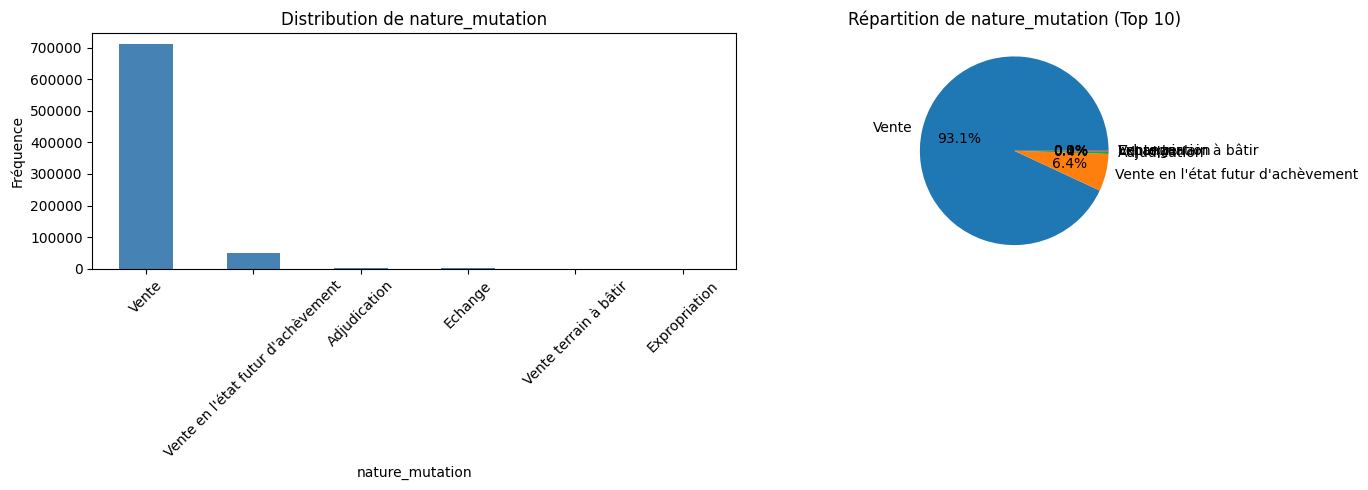

Trop de catégories (42001) pour visualiser

Trop de catégories (526) pour visualiser

Trop de catégories (1285) pour visualiser

Trop de catégories (1281) pour visualiser



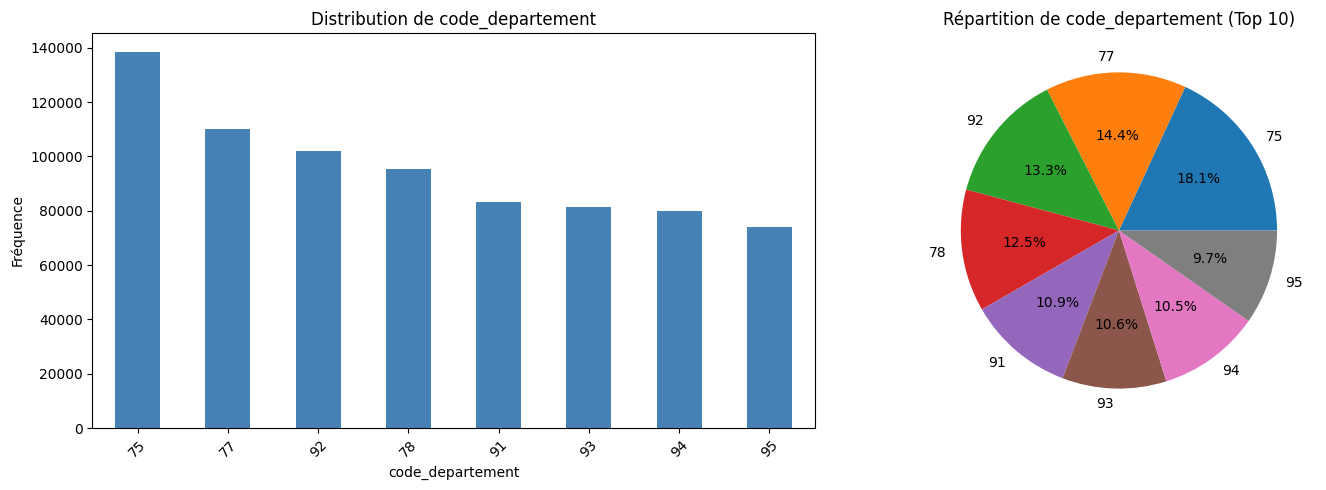

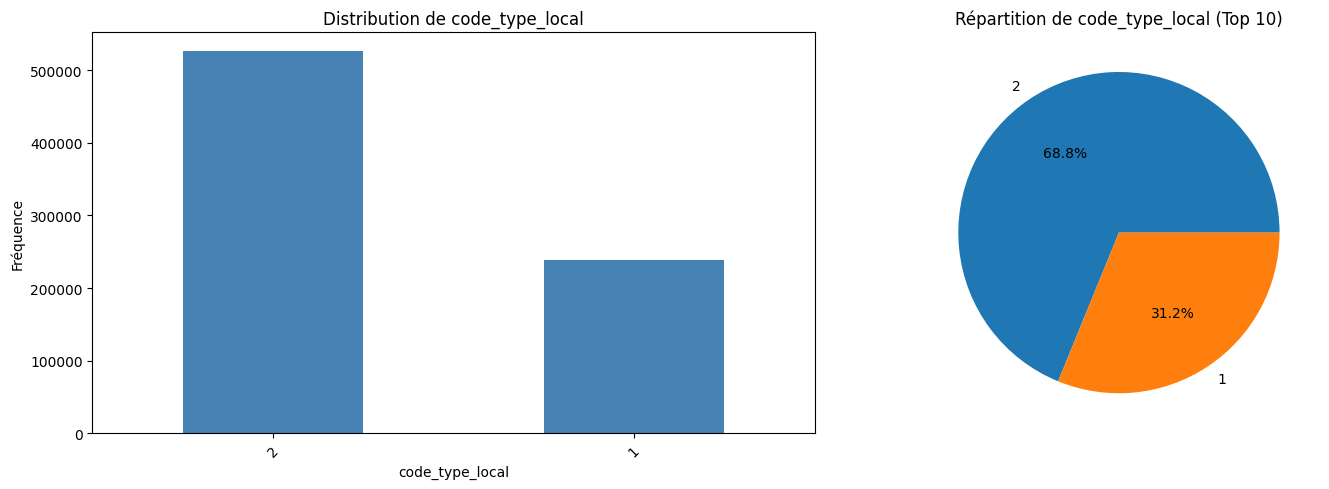

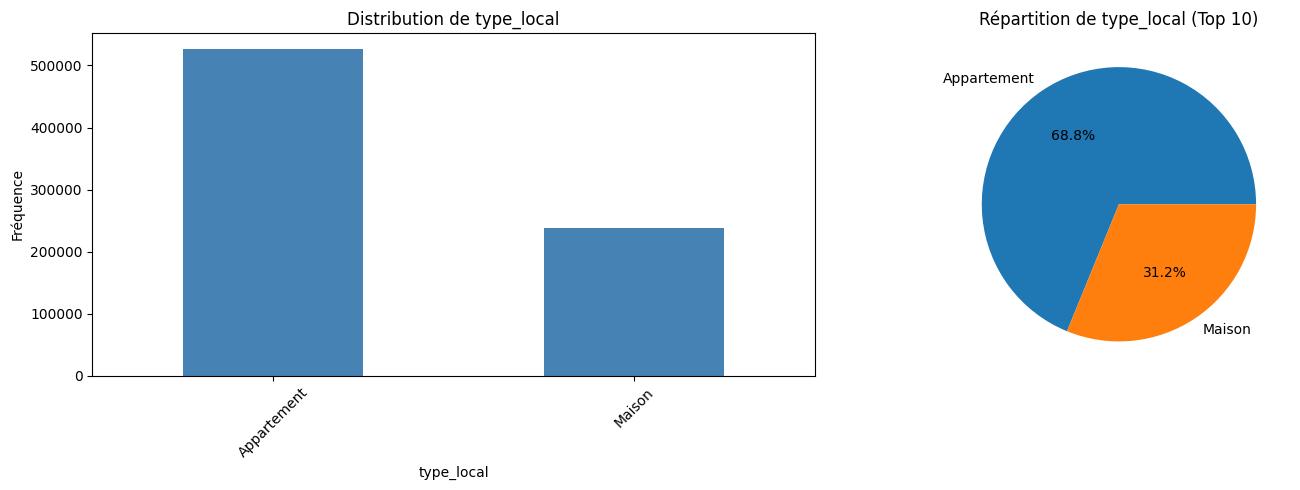

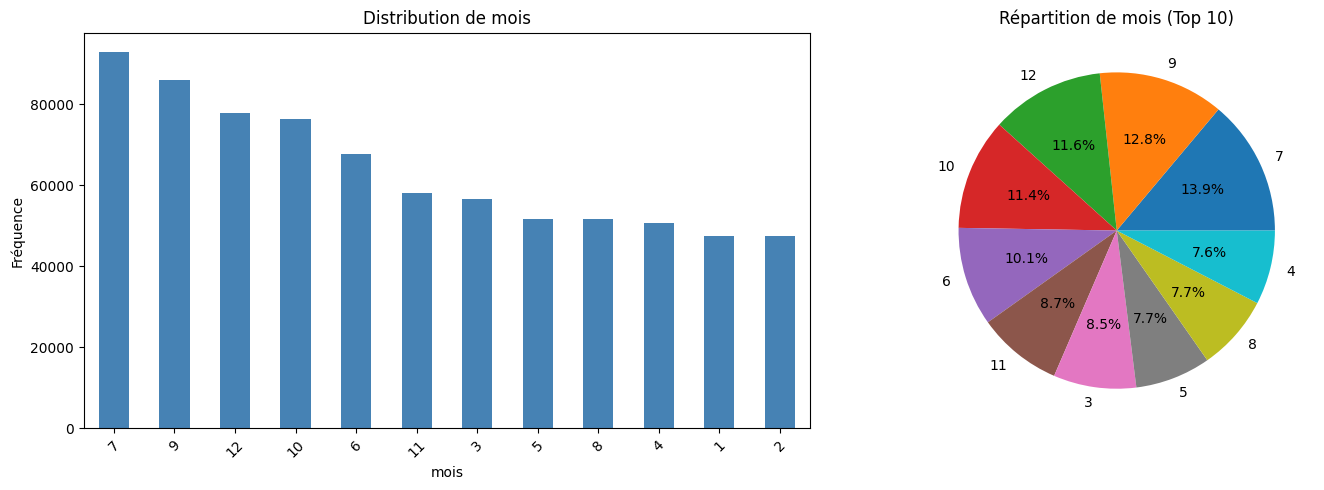

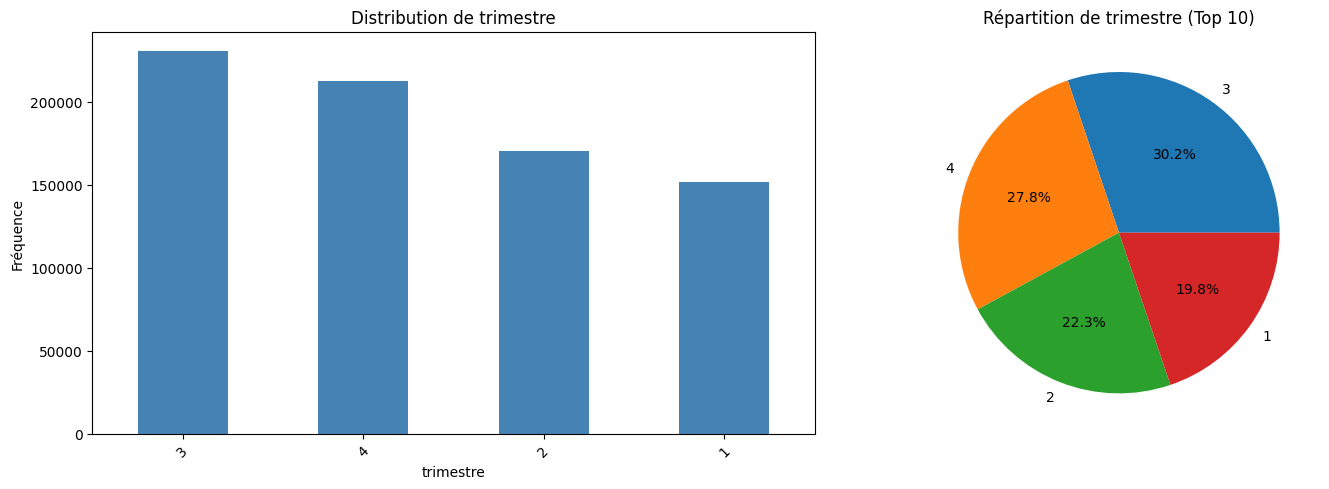

Trop de catégories (1308) pour visualiser

Trop de catégories (1289) pour visualiser



In [48]:
for col in types_vars['categoriques']:
    avql.visualiser_qualitative(X_train, col)


### Analyse de la relation entre chaque variable qualitative et le prix au m2


Relation entre nature_mutation et prix_m2

Statistiques descriptives par catégorie:
                                     count     mean   median      std     min  \
nature_mutation                                                                 
Adjudication                          3035  3908.16  2687.50  3279.48  506.67   
Echange                                890  6073.22  4540.17  4629.28  501.43   
Expropriation                          103  6997.74  5246.34  5077.88  666.67   
Vente                               711712  5978.70  4714.29  3665.83  500.24   
Vente en l'état futur d'achèvement   48862  5511.84  4967.23  2052.43  563.68   
Vente terrain à bâtir                  116  6457.91  5212.56  4628.54  752.69   

                                         max  
nature_mutation                               
Adjudication                        19789.47  
Echange                             19314.29  
Expropriation                       19562.50  
Vente                          

/Users/pierrequintindekercadio/Desktop/MOSEF/machine_learning/land_value_prediction/src/land_value_prediction/analyse_base_de_donnees/analyse_variable_qualitative.py:144: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats_by_cat = data_temp.groupby(col)['prix_m2'].agg([


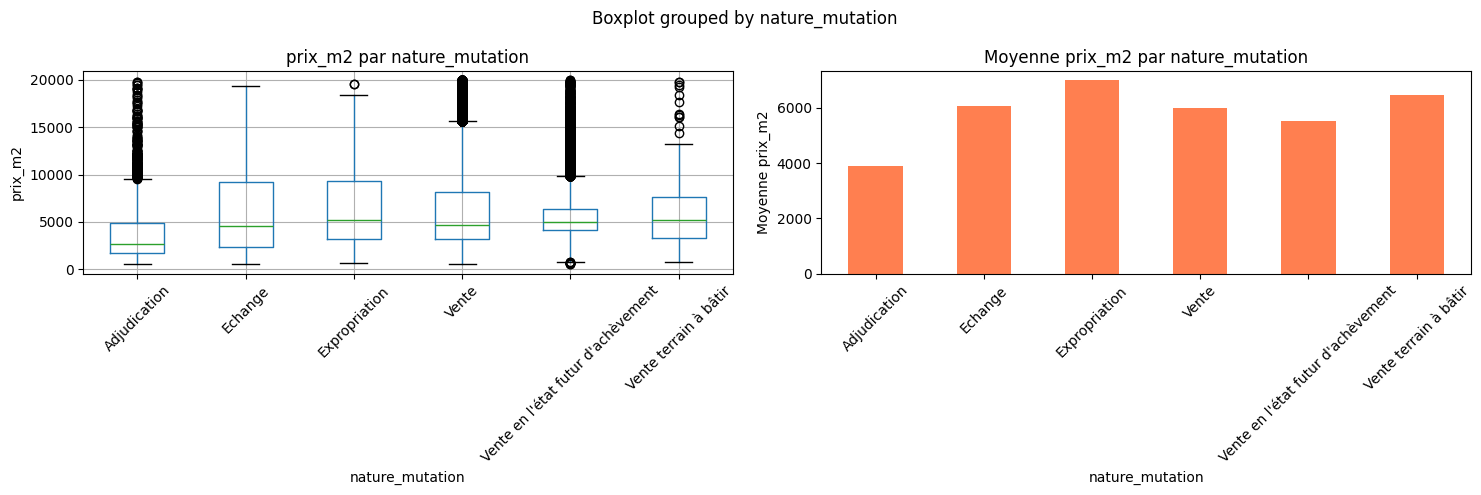


Relation entre adresse_nom_voie et prix_m2

Statistiques descriptives par catégorie:
                               count     mean   median      std      min  \
adresse_nom_voie                                                           
ACCES AUX ABBESSES                12  3991.63  3394.28  1488.01  2915.13   
ACH ANC CHEM DE MEAUX              6  8242.86  6285.71  4548.57  3600.00   
ACH ANCIEN CHE DE VILLAINE         2  5409.02  5409.02  1799.08  4136.87   
ACH ANCIEN CHEM DE VILLIERS        3  3513.47  3636.36   950.50  2507.50   
ACH ANCIEN CHEMIN DE BOULEURS      1  3247.22  3247.22      NaN  3247.22   
ACH ANCIEN CHEMIN DE BRUEIL        2   944.44   944.44     0.00   944.44   
ACH ANCIEN CHEMIN DE PARIS         8  3929.23  3208.33  2681.62  1444.44   
ACH ANCIEN PASS NIVEAU FORET       1  1675.32  1675.32      NaN  1675.32   
ADELAIAU                           2  3823.53  3823.53     0.00  3823.53   
ALL A D AQUITAINE                  1  2435.70  2435.70      NaN  2435.70   
AL

/Users/pierrequintindekercadio/Desktop/MOSEF/machine_learning/land_value_prediction/src/land_value_prediction/analyse_base_de_donnees/analyse_variable_qualitative.py:144: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats_by_cat = data_temp.groupby(col)['prix_m2'].agg([



Test ANOVA (paramétrique):
  F-statistique: 19.1199
  p-value: 0.0000
  Différence significative: Oui


KeyboardInterrupt: 

In [49]:
for col in types_vars['categoriques']:
    avql.analyser_relation_quali_cible(X_train, y_train, col)
    


In [53]:
for col in types_vars['categoriques']:
    print(f"\n--- {col} ---")
    print("TRAIN:")
    print(X_train[col].value_counts(normalize=True).head())



--- nature_mutation ---
TRAIN:
nature_mutation
Vente                                 0.930686
Vente en l'état futur d'achèvement    0.063895
Adjudication                          0.003969
Echange                               0.001164
Vente terrain à bâtir                 0.000152
Name: proportion, dtype: float64

--- adresse_nom_voie ---
TRAIN:
adresse_nom_voie
RUE DE PARIS           0.006079
AV JEAN JAURES         0.004798
AV DE LA REPUBLIQUE    0.004477
GR GRANDE RUE          0.003881
RUE PASTEUR            0.003709
Name: proportion, dtype: float64

--- code_postal ---
TRAIN:
code_postal
75015    0.019434
75018    0.019232
75017    0.015882
75011    0.015215
75016    0.015155
Name: proportion, dtype: float64

--- code_commune ---
TRAIN:
code_commune
75115    0.019397
75118    0.019232
75117    0.015882
75111    0.015215
75116    0.015017
Name: proportion, dtype: float64

--- nom_commune ---
TRAIN:
nom_commune
Paris 15e Arrondissement    0.019397
Paris 18e Arrondissement    0.019232

# ANALYSE DES VARIABLES QUANTITATIVES

### Statistiques descriptives

In [54]:
avqt.calculer_stats_descriptives(X_train, types_vars['numeriques'])

,Min,Q1,Médiane,Moyenne,Q3,Max,Écart-type,NaN
valeur_fonciere,5200.000000,198528.800000,298500.000000,389114.425235,453095.000000,1.050000e+07,342721.724065,0.0
nombre_lots,0.000000,0.000000,1.000000,1.073473,2.000000,2.300000e+01,0.942223,0.0
surface_reelle_bati,10.000000,43.000000,64.000000,71.620099,89.000000,9.850000e+02,42.363608,0.0
nombre_pieces_principales,1.000000,2.000000,3.000000,3.219906,4.000000,1.500000e+01,1.529329,0.0
surface_terrain,1.000000,241.000000,402.000000,578.717178,552.000000,4.480210e+05,1879.285081,526586.0
longitude,1.453111,2.247774,2.344512,2.362171,2.475217,3.518413e+00,0.250330,11649.0
latitude,48.125164,48.784685,48.854016,48.829489,48.907345,4.923655e+01,0.144280,11649.0
annee,2020.000000,2021.000000,2022.000000,2021.997846,2023.000000,2.024000e+03,1.278238,0.0
prix_median_m2,508.130081,3476.666667,4413.333333,5650.906445,7361.696231,1.970033e+04,2807.969263,0.0
ecart_prix_median_pct,-96.678551,-16.027280,0.000000,7.337259,17.860508,1.495391e+03,50.574101,0.0


In [55]:
print(X_train[types_vars['numeriques']].describe())


       valeur_fonciere    nombre_lots  surface_reelle_bati  \
count     7.647180e+05  764718.000000        764718.000000   
mean      3.891144e+05       1.073473            71.620099   
std       3.427217e+05       0.942223            42.363608   
min       5.200000e+03       0.000000            10.000000   
25%       1.985288e+05       0.000000            43.000000   
50%       2.985000e+05       1.000000            64.000000   
75%       4.530950e+05       2.000000            89.000000   
max       1.050000e+07      23.000000           985.000000   

       nombre_pieces_principales  surface_terrain      longitude  \
count              764718.000000    238132.000000  753069.000000   
mean                    3.219906       578.717178       2.362171   
std                     1.529329      1879.285081       0.250330   
min                     1.000000         1.000000       1.453111   
25%                     2.000000       241.000000       2.247774   
50%                     3.000000 

### Distribution

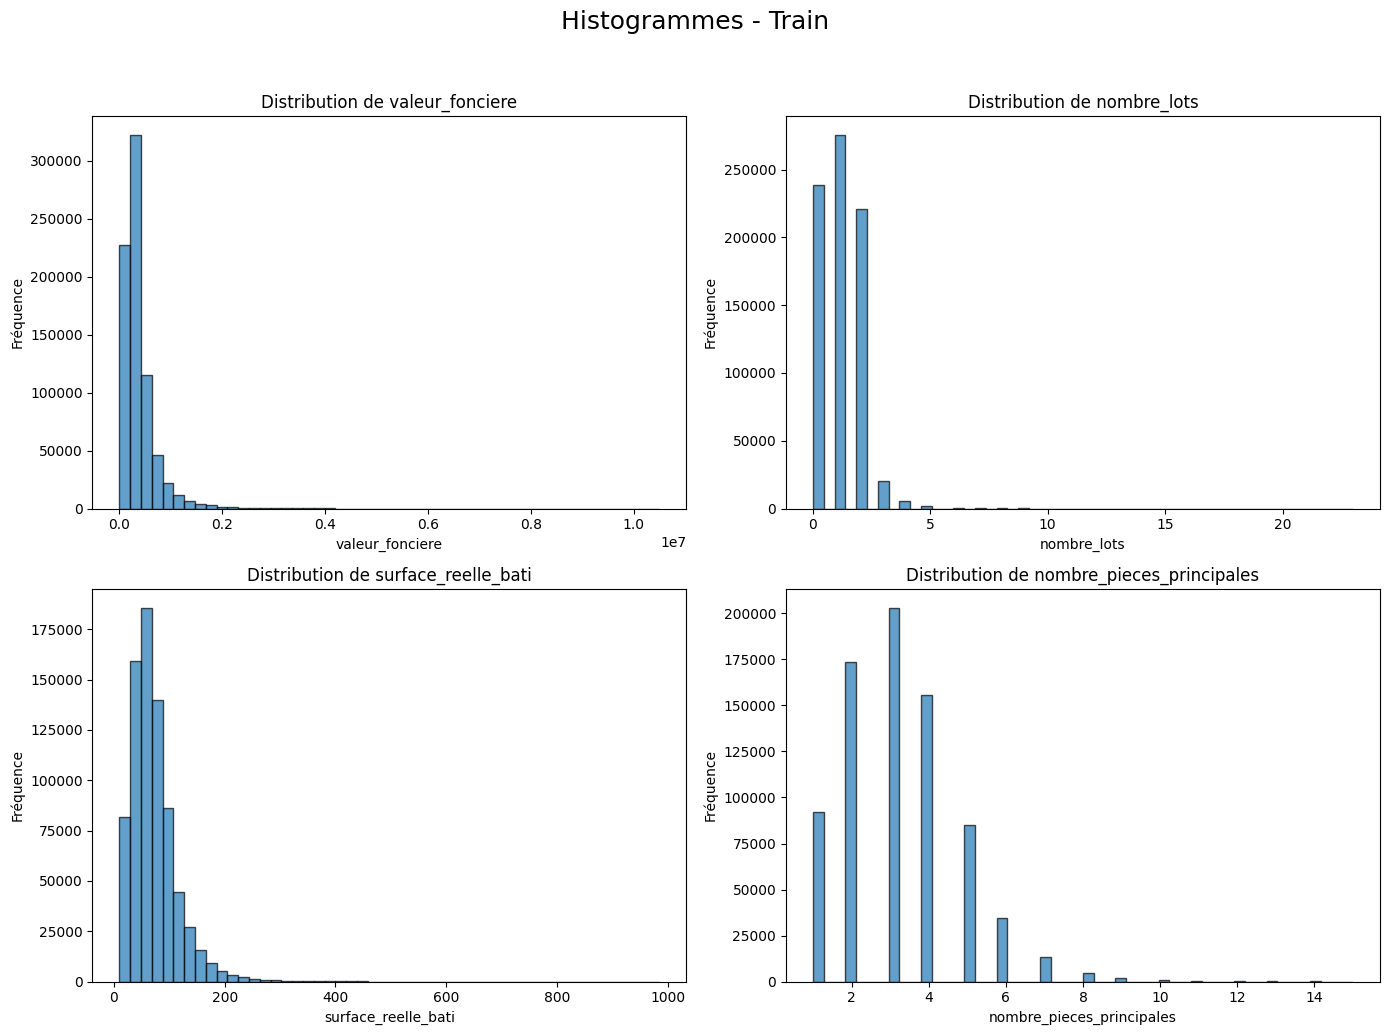

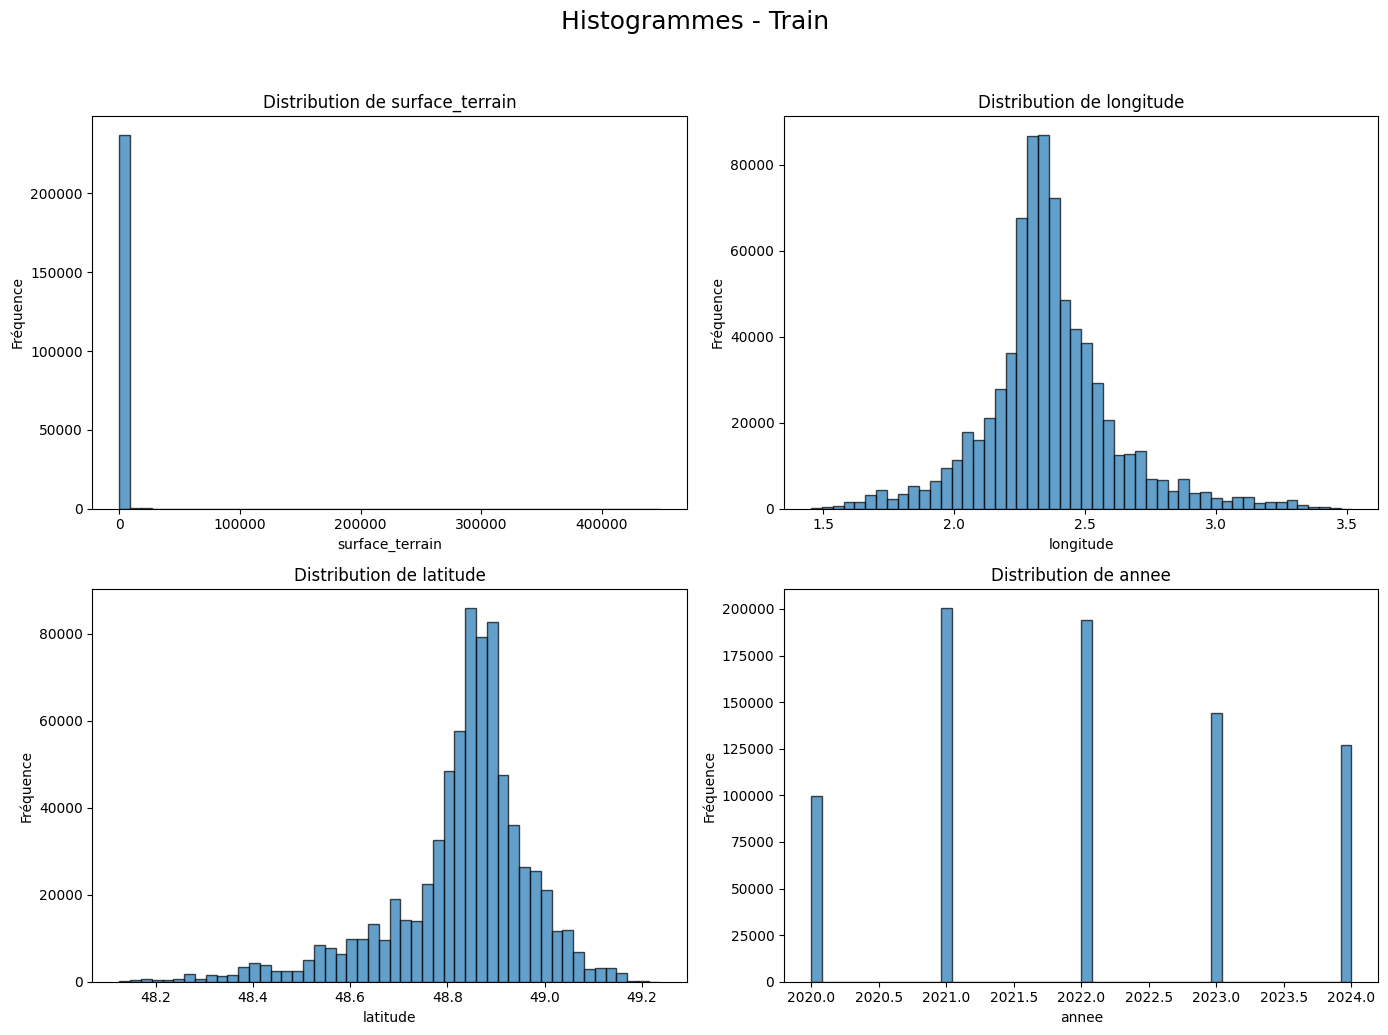

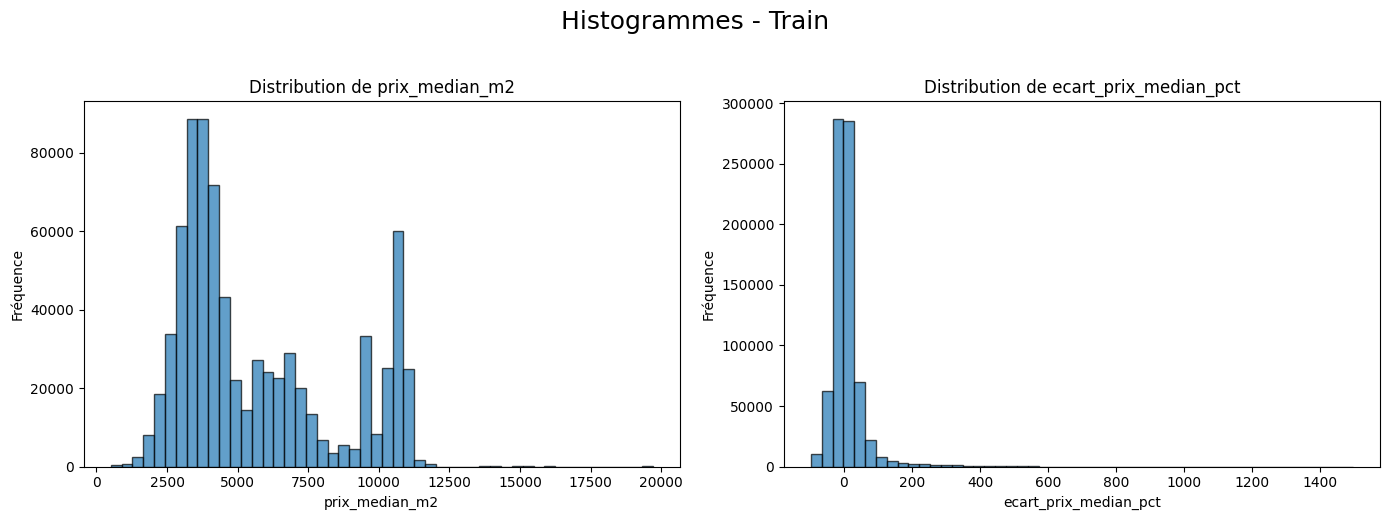

In [56]:
avqt.visualiser_par_batch(X_train, y_train, types_vars['numeriques'], 
                          avqt.plot_histogramme, 
                          "Histogrammes - Train")

### Analyse des Boxplot

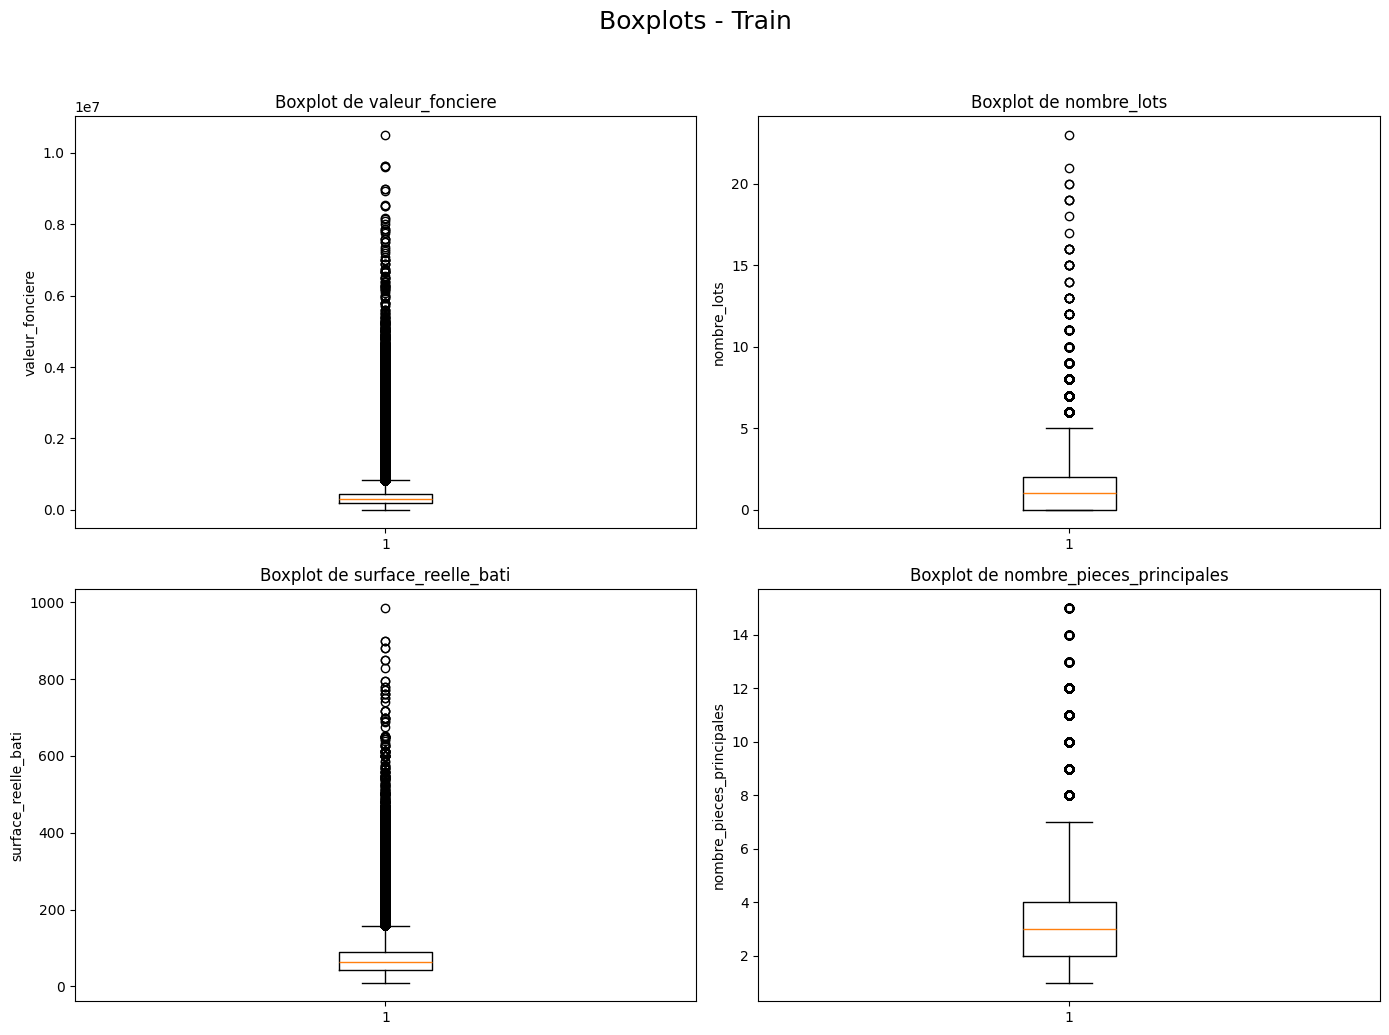

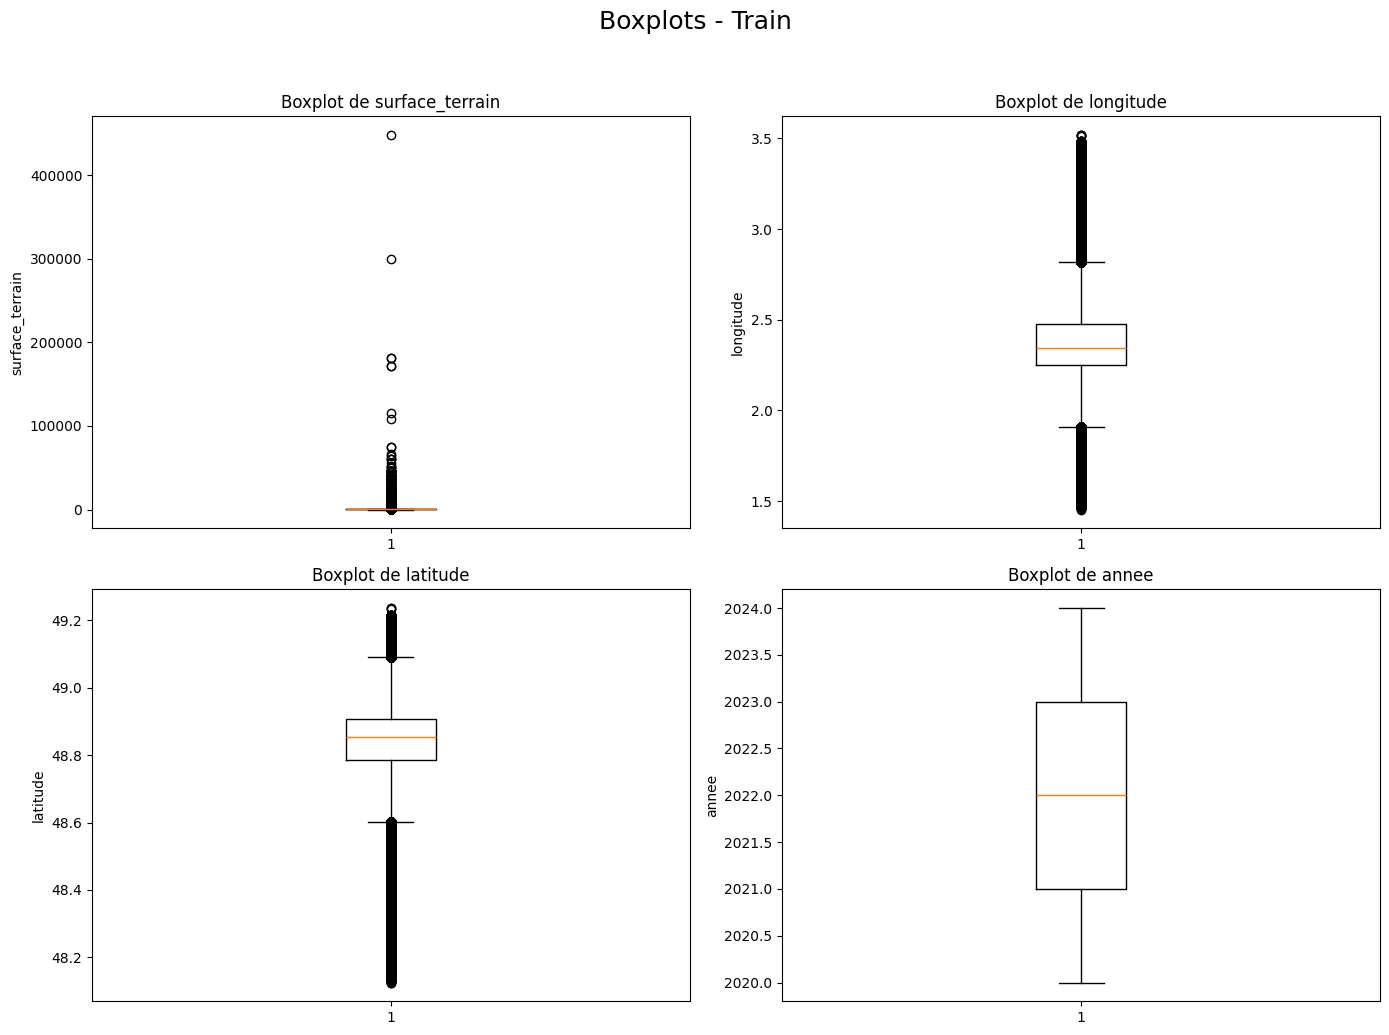

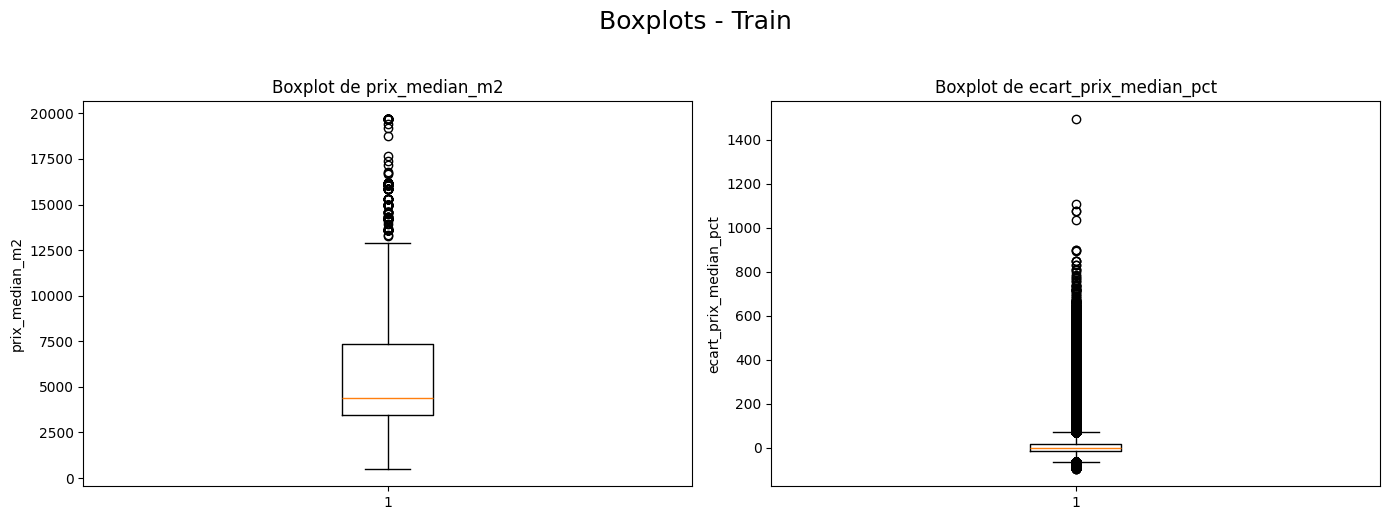

In [57]:
avqt.visualiser_par_batch(X_train, y_train, types_vars['numeriques'], 
                          avqt.plot_boxplot, 
                          "Boxplots - Train")

### Nuage de points 

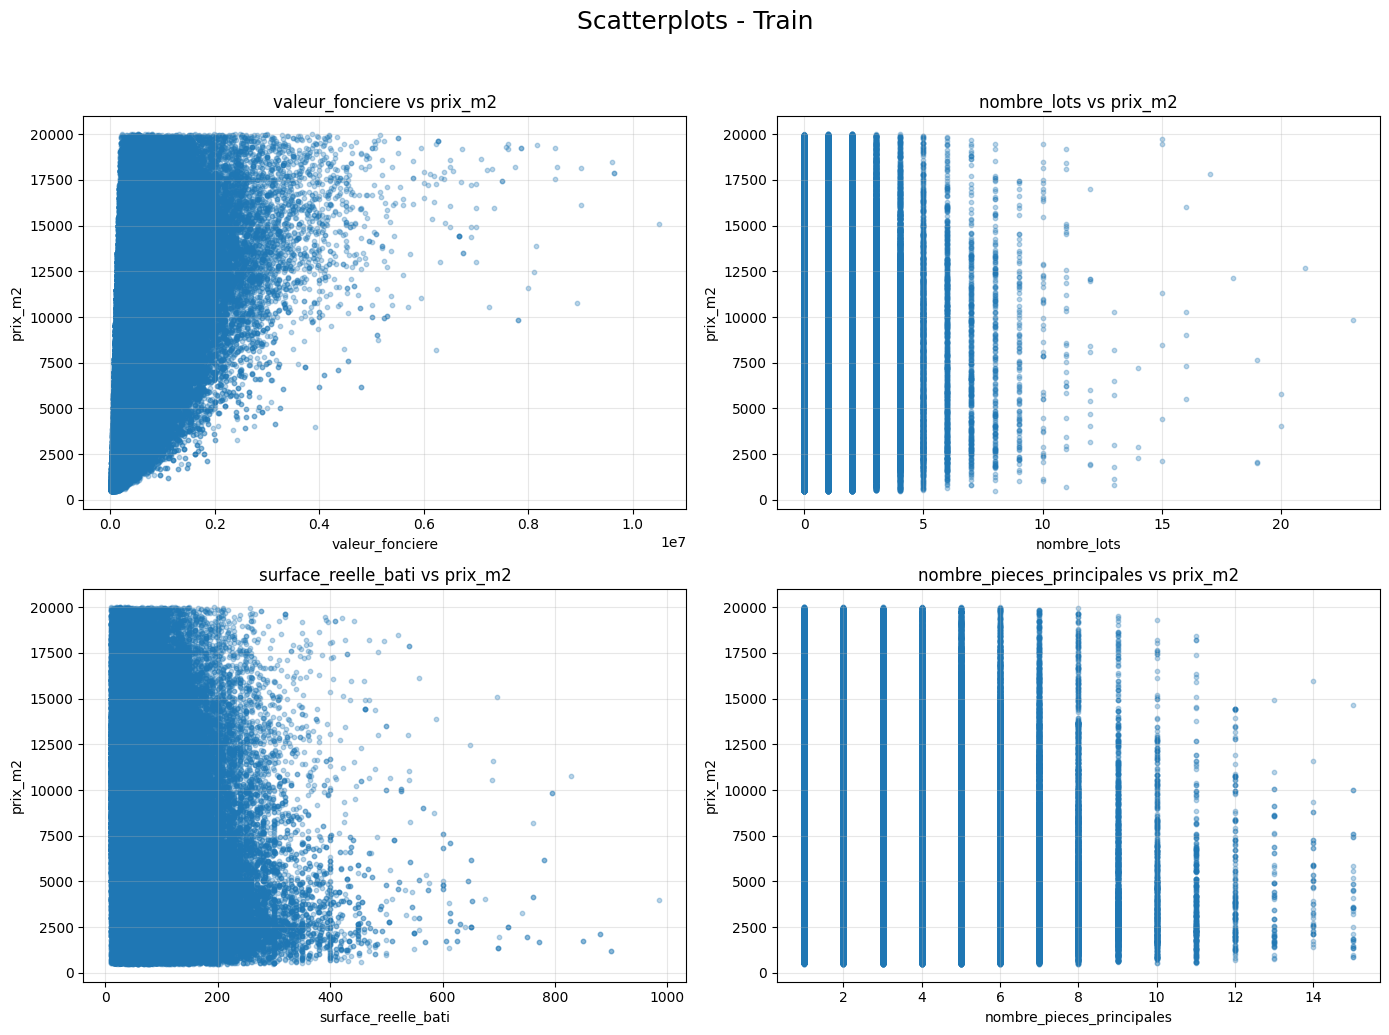

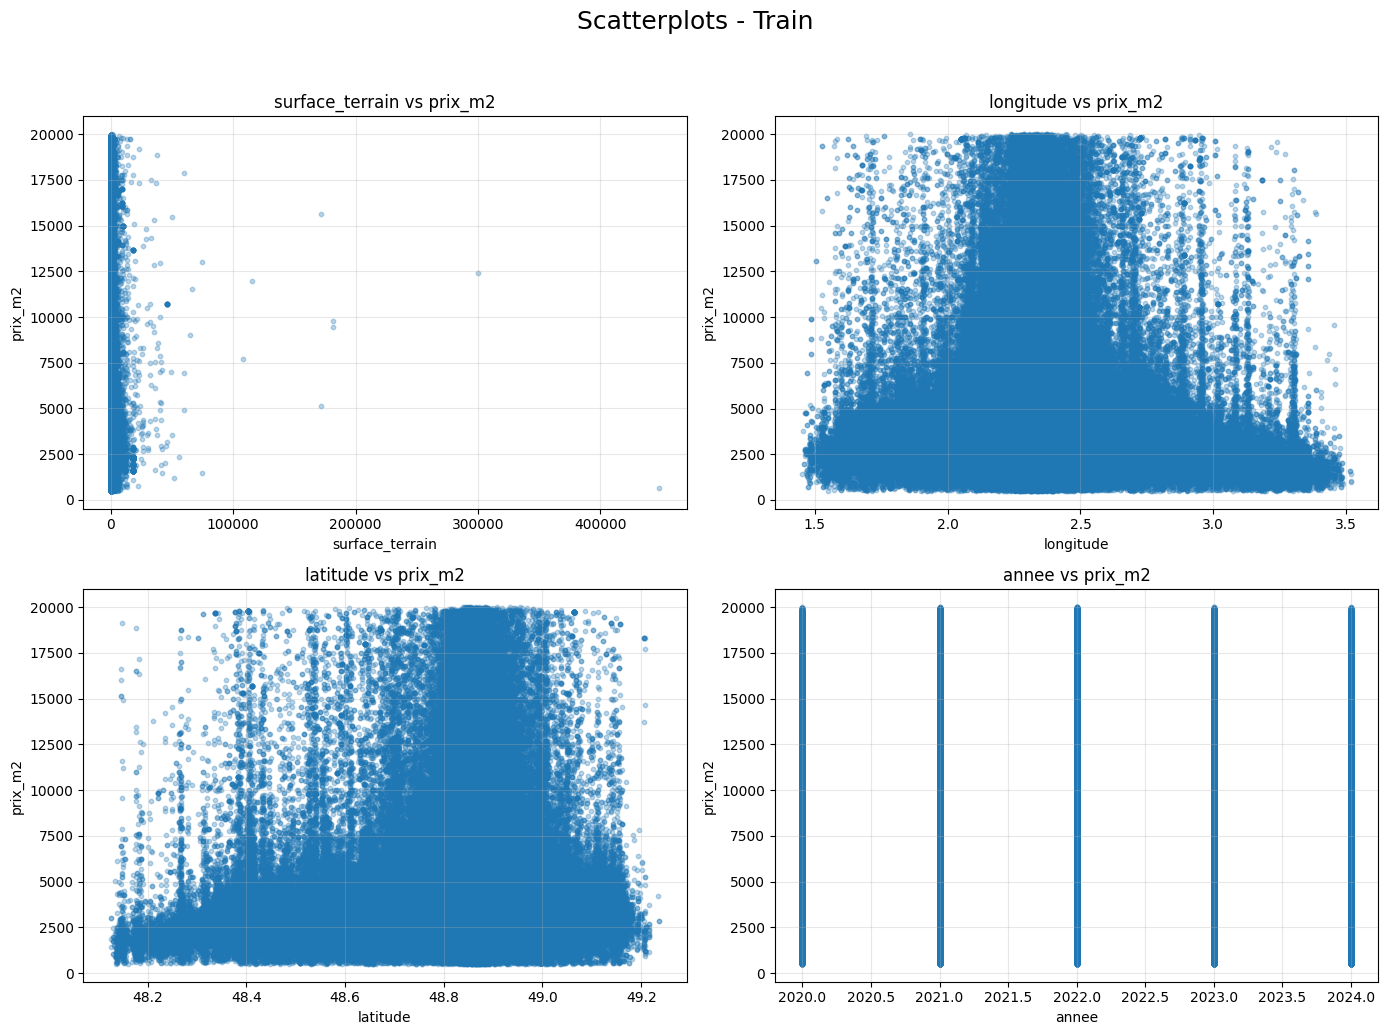

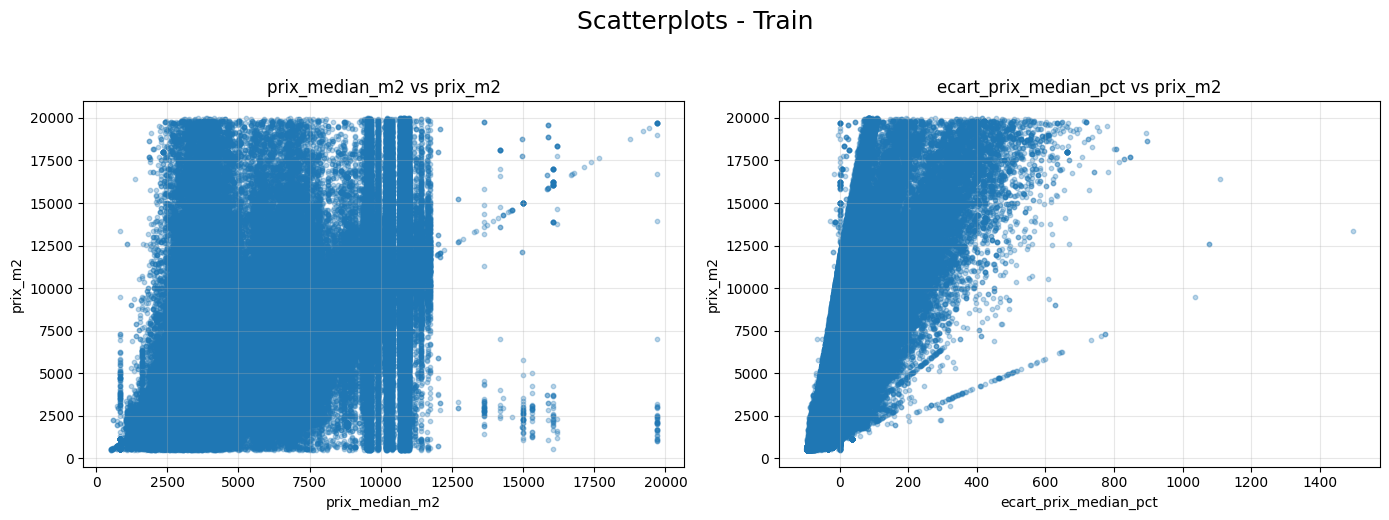

In [58]:
avqt.visualiser_par_batch(X_train, y_train, types_vars['numeriques'], 
                          avqt.plot_scatterplot, 
                          "Scatterplots - Train")

### Test de corrélation

In [59]:
avqt.calculer_correlations(X_train, y_train, types_vars['numeriques'])

,Pearson,Pearson_p,Spearman,Spearman_p,Normal
prix_median_m2,0.750896,0.0,0.782666,0.0,Non
valeur_fonciere,0.53996,0.0,0.566518,0.0,Non
ecart_prix_median_pct,0.521708,0.0,0.531948,0.0,Non
nombre_pieces_principales,-0.284507,0.0,-0.347368,0.0,Non
surface_reelle_bati,-0.239273,0.0,-0.353821,0.0,Non
nombre_lots,0.221208,0.0,0.241644,0.0,Non
latitude,0.149327,0.0,0.079476,0.0,Non
longitude,-0.114717,0.0,-0.152,0.0,Non
annee,0.012686,0.0,0.021647,0.0,Non
surface_terrain,0.010777,0.0,-0.077563,0.0,Non


### Visualisation de la corrélation de Pearson 

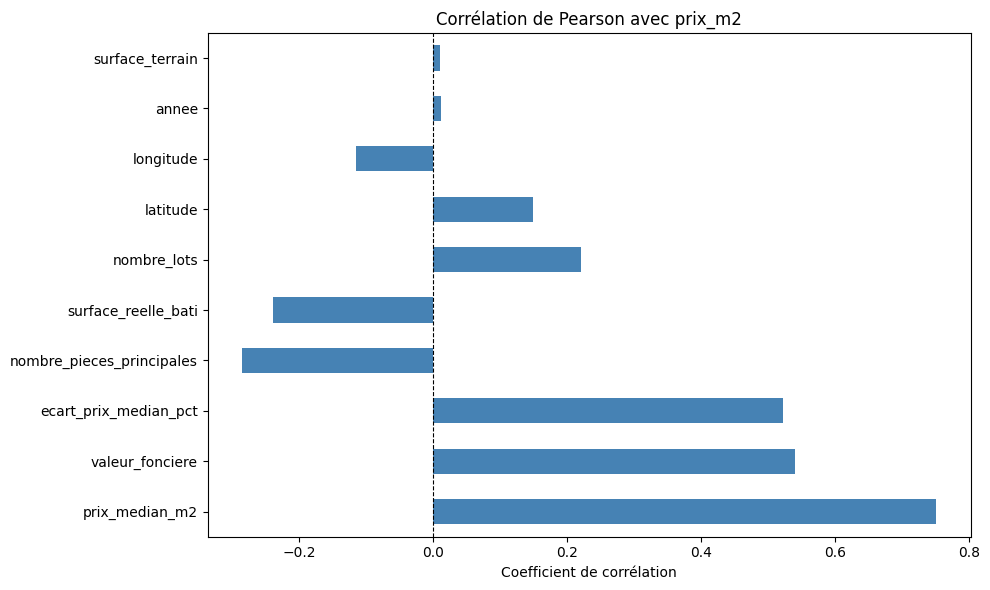

In [60]:
avqt.visualiser_correlations_cible(
    avqt.calculer_correlations(X_train, y_train, types_vars['numeriques'])
)

### Matrice de corrélation

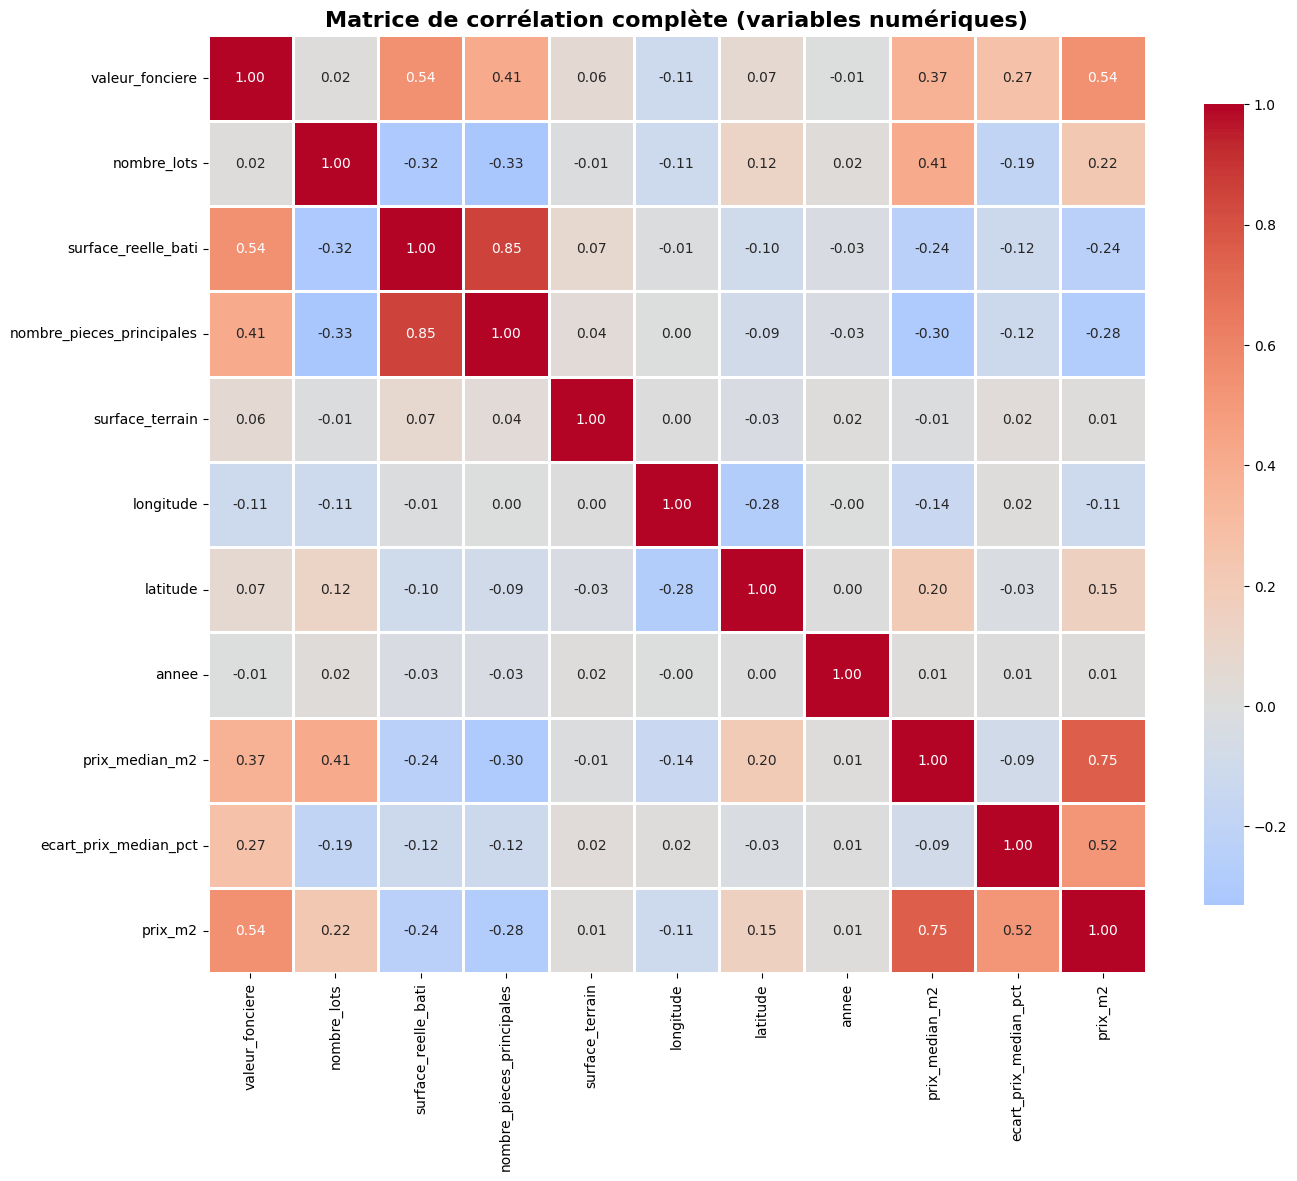

In [61]:
avqt.visualiser_matrice_correlation(X_train, y_train, types_vars['numeriques'])